# EDA

In [1]:

# Первичный анализ данных, предобработка данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from google.colab import drive

# Подключение Google Drive
drive.mount('/content/drive')

# Настройки pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

# Загрузка данных
data = pd.read_excel('/content/drive/MyDrive/data_c/data.xlsx')
print("Данные загружены. Форма:", data.shape)

# Первичный осмотр
print("\n--- info() ---")
data.info()
print("\n--- describe() ---")
display(data.describe().T)
print("\n--- head() ---")
display(data.head(10))


Данные загружены. Форма: (1001, 214)

--- info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB

--- describe() ---


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1001.0,500.000000,289.108111,0.000000,250.000000,500.000000,750.000000,1000.000000
"IC50, mM",1001.0,222.805156,402.169734,0.003517,12.515396,46.585183,224.975928,4128.529377
"CC50, mM",1001.0,589.110728,642.867508,0.700808,99.999036,411.039342,894.089176,4538.976189
SI,1001.0,72.508823,684.482739,0.011489,1.433333,3.846154,16.566667,15620.600000
MaxAbsEStateIndex,1001.0,10.831637,3.307505,2.321942,9.252350,12.179236,13.167843,15.933463
...,...,...,...,...,...,...,...,...
fr_thiazole,1001.0,0.051948,0.222033,0.000000,0.000000,0.000000,0.000000,1.000000
fr_thiocyan,1001.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiophene,1001.0,0.069930,0.255157,0.000000,0.000000,0.000000,0.000000,1.000000
fr_unbrch_alkane,1001.0,0.204795,1.215326,0.000000,0.000000,0.000000,0.000000,20.000000



--- head() ---


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,173.630124,0.000000,0.000000,0.0,0.000000,0.0,0.0,9.984809,0.0,0.0,0.0,54.384066,74.032366,35.342864,0.000000,0.000000,11.423370,0.0,0.000000,43.480583,105.750639,13.089513,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,24.512883,0.000000,33.495774,105.750639,9.984809,0.0,0.0,0,24.72,0.000000,0.000000,0.0,0.000000,21.659962,24.925325,64.208216,11.42337,0.000000,41.542423,9.984809,0.000000,0.0,10.188192,0.000000,4.807589,1.764908,0.000000,13.258223,16.981087,0.000000,0.923077,28,0,2,4,0,4,0,0,0,2,0,2,7,4,0,4,4,7.1212,121.5300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127

In [3]:

# Удаление ненужных столбцов и переименование
cols_drop = ['Unnamed: 0', 'SPS']
data = data.drop(columns=cols_drop)
print(f"\nУдалены столбцы: {cols_drop}")
data = data.rename(columns={'IC50, mM': 'IC50', 'CC50, mM': 'CC50'})
print("Переименованы колонки IC50 и CC50.")



Удалены столбцы: ['Unnamed: 0', 'SPS']
Переименованы колонки IC50 и CC50.


In [4]:

# Удаление признаков со стандартным отклонением = 0
std_vals = data.std(numeric_only=True)
zero_std = std_vals[std_vals == 0].index.tolist()
print(f"\nПризнаки со std=0 ({len(zero_std)}): {zero_std}")
data = data.drop(columns=zero_std)



Признаки со std=0 (18): ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


In [5]:

# Работа с пропусками
miss = data.isnull().sum()
miss = miss[miss > 0]
print(f"\nПризнаки с пропусками:\n{miss}")
# Удаляем строки с пропусками
data = data.dropna()
print(f"После удаления пропусков форма: {data.shape}")



Признаки с пропусками:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64
После удаления пропусков форма: (998, 194)


In [6]:

# Удаление строк с неположительными таргетами
invalid_targets = data[(data['IC50'] <= 0) | (data['CC50'] <= 0) | (data['SI'] <= 0)]
data = data.drop(invalid_targets.index)
print(f"\nУдалено строк с неположительными таргетами: {len(invalid_targets)}")
print(f"Новая форма данных: {data.shape}")



Удалено строк с неположительными таргетами: 0
Новая форма данных: (998, 194)


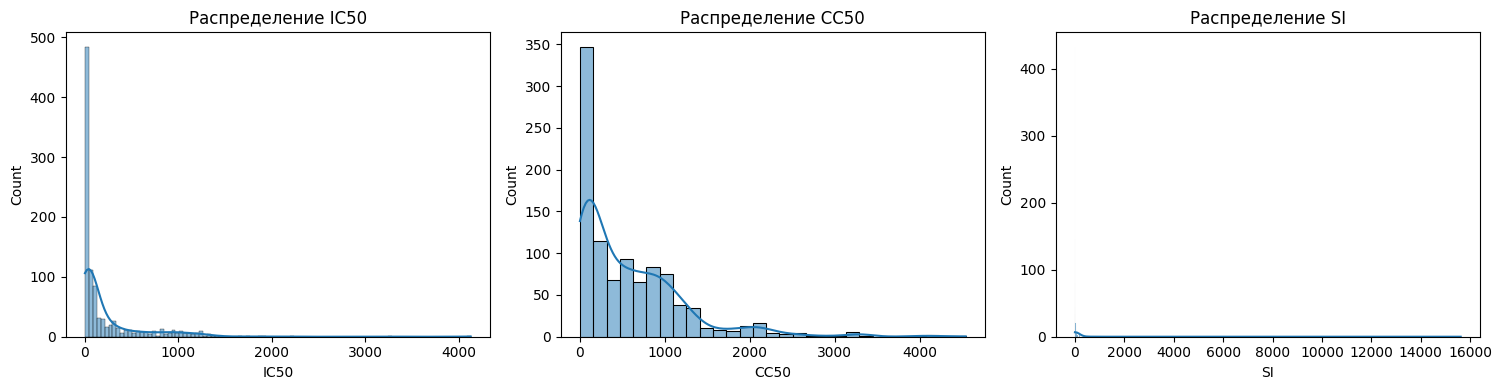

In [7]:

# Распределения таргетов
targets = ['IC50', 'CC50', 'SI']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, targets):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Распределение {col}')
plt.tight_layout()
plt.show()



Добавляем pIC50, pCC50, SI_log


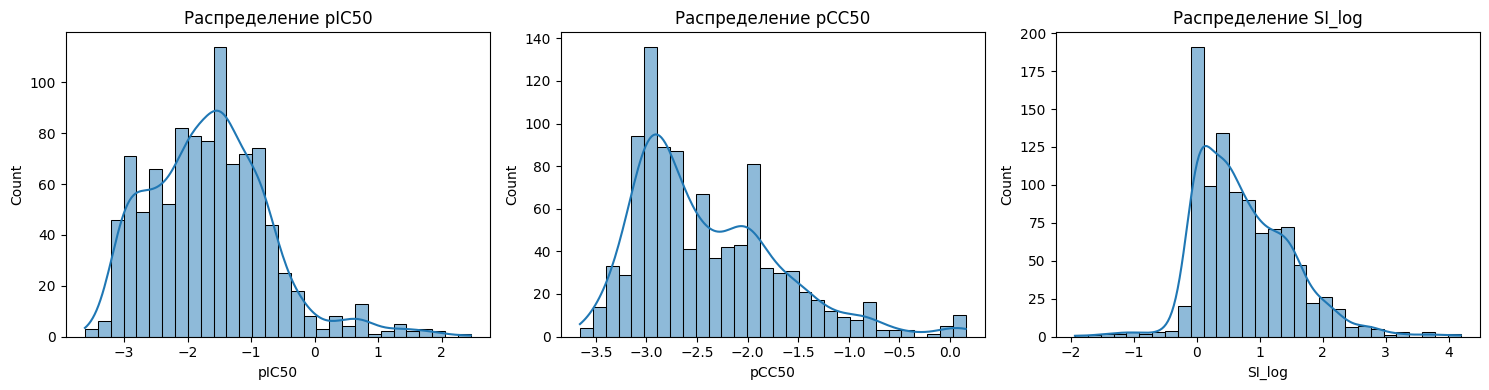

In [8]:

# Лог-преобразования
print("\nДобавляем pIC50, pCC50, SI_log")
data['pIC50'] = -np.log10(data['IC50'])
data['pCC50'] = -np.log10(data['CC50'])
data['SI_log'] = np.log10(data['SI'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data['pIC50'], kde=True, ax=axes[0], bins=30)
sns.histplot(data['pCC50'], kde=True, ax=axes[1], bins=30)
sns.histplot(data['SI_log'], kde=True, ax=axes[2], bins=30)
axes[0].set_title('Распределение pIC50')
axes[1].set_title('Распределение pCC50')
axes[2].set_title('Распределение SI_log')
plt.tight_layout()
plt.show()



Строим корреляционную матрицу


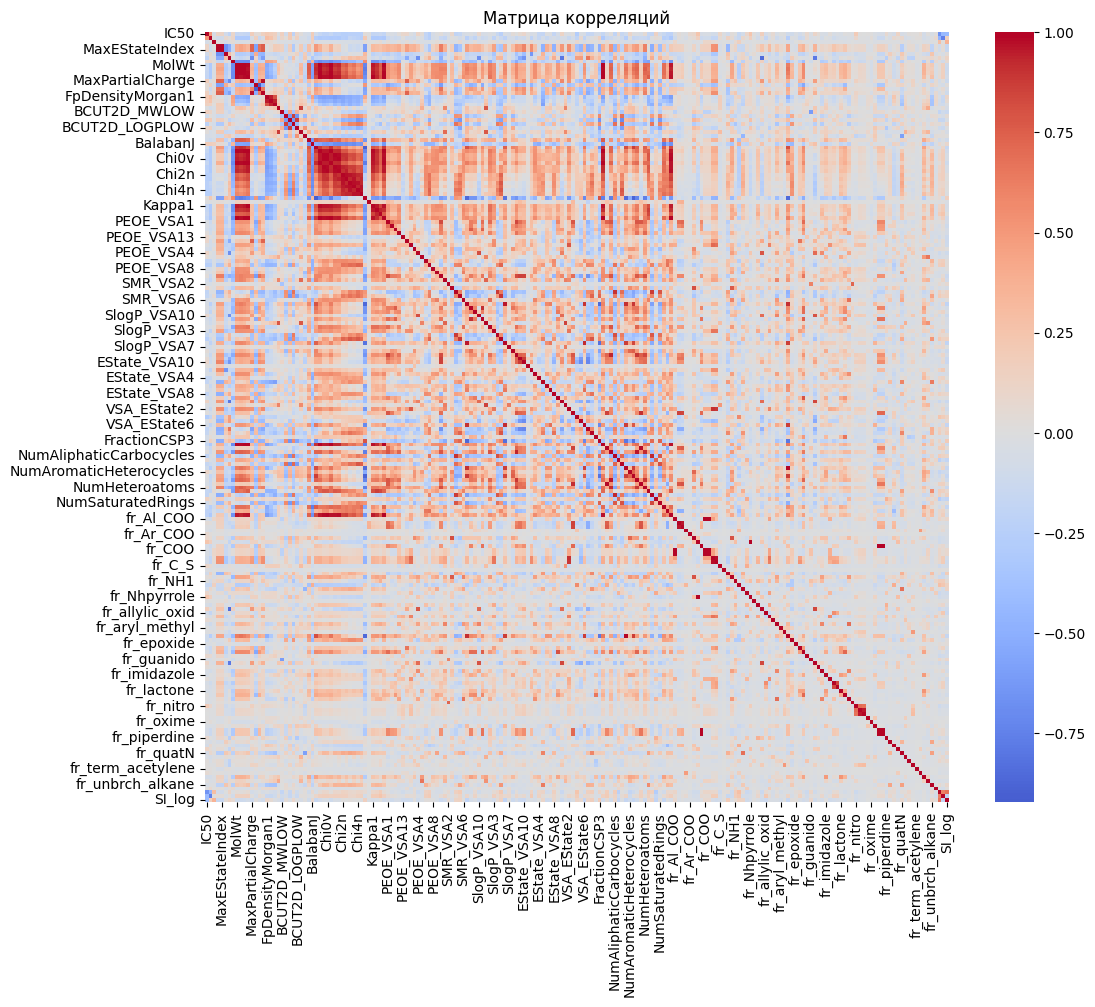

In [9]:

# Корреляционная матрица
print("\nСтроим корреляционную матрицу")
corr = data.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()



Сильно скошенные признаки (|skew|>1): 152
Трансформированы сильно скошенные признаки.


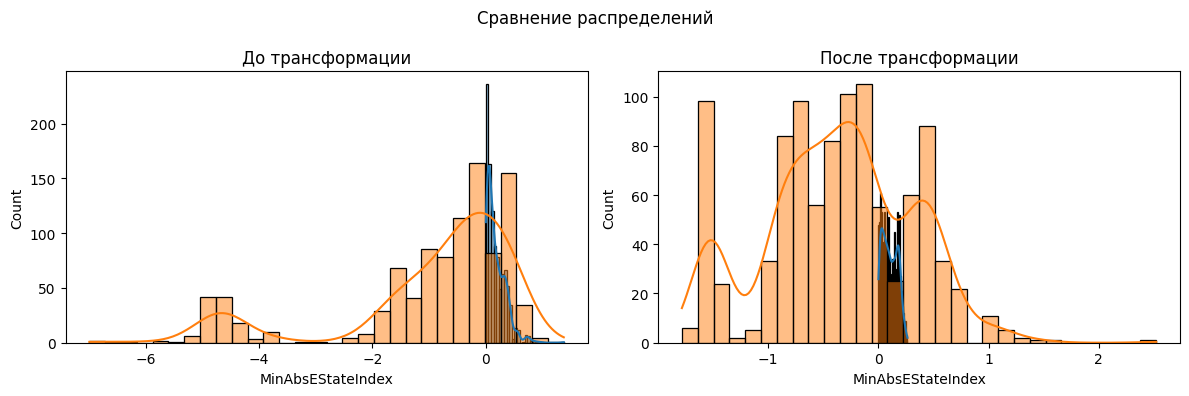

In [10]:

# Трансформация сильно скошенных признаков
num_cols = data.select_dtypes(include='number').columns.drop(['IC50','CC50','SI'], errors='ignore')
skew_vals = data[num_cols].skew()
skewed = skew_vals[abs(skew_vals) > 1.0].index.tolist()
print(f"\nСильно скошенные признаки (|skew|>1): {len(skewed)}")

if skewed:
    # Создаем копию для трансформации
    data_transformed = data.copy()
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    data_transformed[skewed] = pt.fit_transform(data_transformed[skewed])
    print("Трансформированы сильно скошенные признаки.")

    # Визуализация результатов
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    for i, col in enumerate(skewed[:2]):  # Первые 2 для примера
        sns.histplot(data[col], ax=axes[0], kde=True, bins=30)
        sns.histplot(data_transformed[col], ax=axes[1], kde=True, bins=30)
    axes[0].set_title('До трансформации')
    axes[1].set_title('После трансформации')
    plt.suptitle('Сравнение распределений')
    plt.tight_layout()
    plt.show()

    data = data_transformed


# Feature Engineering


In [11]:

# Базовые преобразования
print("\nБазовые лог-преобразования")
data['log_MolWt'] = np.log10(data['MolWt'] + 1e-6)



Базовые лог-преобразования


<ipython-input-11-1137672375>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['log_MolWt'] = np.log10(data['MolWt'] + 1e-6)


In [12]:

# Отношение H-доноры / H-акцепторы
print("\nБаланс H-связей")
data['Hbond_Balance'] = data['NumHAcceptors'] / (data['NumHDonors'] + 1e-6)
data['Log_Hbond_Balance'] = np.log10(data['Hbond_Balance'] + 1e-6)



Баланс H-связей


<ipython-input-12-3749263881>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Hbond_Balance'] = data['NumHAcceptors'] / (data['NumHDonors'] + 1e-6)
<ipython-input-12-3749263881>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Log_Hbond_Balance'] = np.log10(data['Hbond_Balance'] + 1e-6)


In [13]:

# Отношение массы к TPSA
print("\nМасса / TPSA")
data['Wt_to_TPSA'] = data['MolWt'] / (data['TPSA'] + 1e-6)
data['Log_Wt_to_TPSA'] = np.log10(data['Wt_to_TPSA'] + 1e-6)



Масса / TPSA


<ipython-input-13-2569377456>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Wt_to_TPSA'] = data['MolWt'] / (data['TPSA'] + 1e-6)
<ipython-input-13-2569377456>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Log_Wt_to_TPSA'] = np.log10(data['Wt_to_TPSA'] + 1e-6)


In [14]:

# SP3 к Kappa1
print("\nSP3_to_Kappa1")
data['SP3_to_Kappa1'] = data['FractionCSP3'] / (data['Kappa1'] + 1e-6)
data['Log_SP3_to_Kappa1'] = np.log10(data['SP3_to_Kappa1'] + 1e-6)



SP3_to_Kappa1


<ipython-input-14-612358162>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['SP3_to_Kappa1'] = data['FractionCSP3'] / (data['Kappa1'] + 1e-6)
<ipython-input-14-612358162>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Log_SP3_to_Kappa1'] = np.log10(data['SP3_to_Kappa1'] + 1e-6)


In [15]:

# Гибкость
print("\nГибкость")
data['Flexibility'] = data['NumRotatableBonds'] / (data['HeavyAtomCount'] + 1e-6)
data['Log_Flexibility'] = np.log10(data['Flexibility'] + 1e-6)



Гибкость


<ipython-input-15-2085362374>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Flexibility'] = data['NumRotatableBonds'] / (data['HeavyAtomCount'] + 1e-6)
<ipython-input-15-2085362374>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Log_Flexibility'] = np.log10(data['Flexibility'] + 1e-6)


In [16]:

# SP3 * MolWt
print("\nSP3_times_Wt")
data['SP3_times_Wt'] = data['FractionCSP3'] * data['MolWt']
data['Log_SP3_times_Wt'] = np.log10(data['SP3_times_Wt'] + 1e-6)



SP3_times_Wt


<ipython-input-16-55305627>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['SP3_times_Wt'] = data['FractionCSP3'] * data['MolWt']
<ipython-input-16-55305627>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Log_SP3_times_Wt'] = np.log10(data['SP3_times_Wt'] + 1e-6)


In [17]:

# Общее число H-связей
print("\nHbond_Total")
data['Hbond_Total'] = data['NumHAcceptors'] + data['NumHDonors']
data['Log_Hbond_Total'] = np.log10(data['Hbond_Total'] + 1e-6)



Hbond_Total


<ipython-input-17-2150962102>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Hbond_Total'] = data['NumHAcceptors'] + data['NumHDonors']
<ipython-input-17-2150962102>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Log_Hbond_Total'] = np.log10(data['Hbond_Total'] + 1e-6)


In [18]:

# Групповые агрегаты дескрипторов
print("\nГрупповые агрегации по VSA/Chi/Kappa")
groups = {
    'Chi': [c for c in data.columns if c.startswith('Chi')],
    'Kappa': [c for c in data.columns if c.startswith('Kappa')],
    'PEOE_VSA': [c for c in data.columns if c.startswith('PEOE_VSA')],
    'EState_VSA': [c for c in data.columns if c.startswith('EState_VSA')],
    'SMR_VSA': [c for c in data.columns if c.startswith('SMR_VSA')],
    'SlogP_VSA':[c for c in data.columns if c.startswith('SlogP_VSA')],
}
for grp, cols in groups.items():
    if cols:  # Проверка на пустой список
        data[f'{grp}_mean'] = data[cols].mean(axis=1)
        data[f'{grp}_max'] = data[cols].max(axis=1)
        data[f'{grp}_sum'] = data[cols].sum(axis=1)
        data[f'{grp}_std'] = data[cols].std(axis=1)
        print(f"{grp}: mean, max, sum, std добавлены")



Групповые агрегации по VSA/Chi/Kappa
Chi: mean, max, sum, std добавлены
Kappa: mean, max, sum, std добавлены
PEOE_VSA: mean, max, sum, std добавлены
EState_VSA: mean, max, sum, std добавлены
SMR_VSA: mean, max, sum, std добавлены


<ipython-input-18-1231285498>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{grp}_mean'] = data[cols].mean(axis=1)
<ipython-input-18-1231285498>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{grp}_max'] = data[cols].max(axis=1)
<ipython-input-18-1231285498>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

SlogP_VSA: mean, max, sum, std добавлены


<ipython-input-18-1231285498>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{grp}_sum'] = data[cols].sum(axis=1)
<ipython-input-18-1231285498>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{grp}_std'] = data[cols].std(axis=1)


In [19]:

# Обрезка выбросов (IQR)
all_cols = data.columns
exclude_cols = ['pIC50','pCC50','SI_log','IC50','CC50','SI']

for col in all_cols:
    if col in exclude_cols:
        continue

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR

    before_min = data[col].min()
    before_max = data[col].max()
    data[col] = data[col].clip(lower=low, upper=high)

In [20]:

# Удаление высококоррелированных признаков
target_cols = ['IC50','pIC50','CC50','pCC50','SI','SI_log']
features = [col for col in data.columns if col not in target_cols]

corr_matrix = data[features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.87
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print(f"Будут удалены {len(to_drop)} признаков с корреляцией > {threshold}")
data = data.drop(columns=to_drop)

print(f"Новая форма данных: {data.shape}")


Будут удалены 67 признаков с корреляцией > 0.87
Новая форма данных: (998, 167)


# Сохранение и проверка

In [21]:

# Сохраняем результат
out_path = '/content/drive/MyDrive/data_c/data_fe.csv'
data.to_csv(out_path, index=False)
print(f"\nFeature-engineered data saved to {out_path}. Shape: {data.shape}")



Feature-engineered data saved to /content/drive/MyDrive/data_c/data_fe.csv. Shape: (998, 167)


In [22]:

# Финальная проверка
print("\nФинальная информация:")
print(f"Размер данных: {data.shape}")
print(f"Колонки: {list(data.columns)}")
print("\nОписательная статистика:")
display(data.describe().T)


Финальная информация:
Размер данных: (998, 167)
Колонки: ['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA7', 'SlogP_VSA8', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1', 'VS

,count,mean,std,min,25%,50%,75%,max
IC50,998.0,221.118757,400.510657,0.003517,12.491340,45.992006,224.408630,4128.529377
CC50,998.0,586.668414,642.016454,0.700808,99.999036,408.793314,891.770961,4538.976189
SI,998.0,72.650005,685.504279,0.011489,1.457233,3.856410,16.525000,15620.600000
MaxAbsEStateIndex,998.0,10.833463,3.301971,2.867681,9.050397,12.187546,13.172207,15.933463
MinAbsEStateIndex,998.0,0.103731,0.066940,0.000039,0.045516,0.095661,0.166761,0.263802
...,...,...,...,...,...,...,...,...
EState_VSA_mean,998.0,2.925091,0.674017,1.148881,2.421558,2.866290,3.322946,4.675027
EState_VSA_max,998.0,7.623703,1.919163,3.702559,6.280057,7.263310,8.778774,12.526851
EState_VSA_std,998.0,2.628664,0.587214,1.308235,2.182359,2.542708,3.037205,4.319474
SMR_VSA_mean,998.0,10.458483,3.271059,2.561895,8.341606,10.235238,12.194747,17.974458
